In [131]:
import time #import the time module. Used for adding pauses during operation
from Arm_Lib import Arm_Device #import the module associated with the arm
from scipy.spatial.transform import Rotation as R
import scipy.io as sio
#from Part1_FK import fk_Dofbot

import general_robotics_toolbox as rox
import math
import numpy as np
# from general_robotics_toolbox_invkin import iterative_invkin as inv

from qpsolvers import solve_qp

import matplotlib.pyplot as plt
import numpy as np

Arm = Arm_Device() # Get DOFBOT object
time.sleep(.2) #this pauses execution for the given number of seconds

In [132]:
def main():  
    
    #importing relavent variables
    pathPlannedOutput1 = sio.loadmat("pathoutput1.mat")
    pathPlannedOutput2 = sio.loadmat("pathoutput2.mat")
    pathPlannedOutput3 = sio.loadmat("pathoutput3.mat")
    pathPlannedOutput4 = sio.loadmat("pathoutput4.mat")
    
    lambda1 = pathPlannedOutput1.get("lambda")
    P0T_lambda1 = pathPlannedOutput1.get("P0T_lambda")
    R0T_lambda1 = pathPlannedOutput1.get("R0T_lambda")
    q_lambda1 = pathPlannedOutput1.get("q_lambdadegree")
    q_start1 = [140, 30, 180, 20, 90] 
    
    lambda2 = pathPlannedOutput2.get("lambda")
    P0T_lambda2 = pathPlannedOutput2.get("P0T_lambda")
    R0T_lambda2 = pathPlannedOutput2.get("R0T_lambda")
    q_lambda2 = pathPlannedOutput2.get("q_lambdadegree")
    q_start2 = [15, 140, 0, 45, 0]
    
    lambda3 = pathPlannedOutput3.get("lambda")
    P0T_lambda3 = pathPlannedOutput3.get("P0T_lambda")
    R0T_lambda3 = pathPlannedOutput3.get("R0T_lambda")
    q_lambda3 = pathPlannedOutput3.get("q_lambdadegree")
    q_start3 = [90, 90, 90, 90, 90]
    
    lambda4 = pathPlannedOutput4.get("lambda")
    P0T_lambda4 = pathPlannedOutput4.get("P0T_lambda")
    R0T_lambda4 = pathPlannedOutput4.get("R0T_lambda")
    q_lambda4 = pathPlannedOutput4.get("q_lambdadegree")
    q_start4 = [110, 0, 180, 90, 45]
    
    expectedJointAngles = []
    actualJointAngles = []
    q_measure = [0]*5
    lam = q_lambda3
    
    #setting initial config for arm joints
    initConfig(q_start3)
    measureAngle(q_measure)
    
    #measuring what the what the joints should look like in the first step and what they actually look like
    expectedJointAngles.append(lam[:,0])
    actualJointAngles.append(q_measure.copy())
    
    #starting timer
    time.sleep(3)
    startTime = time.time()
    timeArr = [0]*100
    timeArr[0] = time.time()-startTime
    
    
    
    #looping through the number if lambdas to increment to each next point
    for i in range(1, len(q_lambda1[0])-1):
        Arm.Arm_serial_servo_write6(lam[0,i],lam[1,i], lam[2,i], lam[3,i], lam[4,i], 0, 200) # setting arm to next increment
             
        #time.sleep(1)
        timeArr[i-1] = time.time()-startTime
        
        #measuring each joint angle, making sure they are not blank variables
        q_measure[0] = (Arm.Arm_serial_servo_read(1))
        while(q_measure[0] == None):
            q_measure[0] = (Arm.Arm_serial_servo_read(1))
                   
        q_measure[1] = (Arm.Arm_serial_servo_read(2))
        while(q_measure[1] == None):
            q_measure[1] = (Arm.Arm_serial_servo_read(2))
            
        q_measure[2] = (Arm.Arm_serial_servo_read(3))
        while(q_measure[2] == None):
            q_measure[2] = (Arm.Arm_serial_servo_read(3))
                   
        q_measure[3] = (Arm.Arm_serial_servo_read(4))
        while(q_measure[3] == None):
            q_measure[3] = (Arm.Arm_serial_servo_read(4))
                   
        q_measure[4] = (Arm.Arm_serial_servo_read(5))
        while(q_measure[4] == None):
            q_measure[4] = (Arm.Arm_serial_servo_read(5))
        
        #adding the current increment to the expected and actual joint arrays
        expectedJointAngles.append(lam[:,i])
        actualJointAngles.append(q_measure.copy())
        
    print("Done Moving")
    
    #plotting results
    numJoints = 5
    rows = (numJoints + 1) // 2  # Calculate required rows for 2 columns
    plt.figure(figsize=(12, 10))
    print("Average Joint Errors:")

    for i in range(numJoints):
        measured = [angles[i] for angles in actualJointAngles]
        expected = [angles[i] for angles in expectedJointAngles]


#         print("Joint {}: {:.2f}°".format(i+1, np.subtract(np.array(measured), np.array(expected))/len(measured)))

        plt.subplot(rows, 2, i + 1)
        plt.plot(timeArr, measured, label=f'Joint {i+1} Measured', linestyle='-', marker='o')
        plt.plot(timeArr, expected, label=f'Joint {i+1} Expected', linestyle='--', marker='x')

        plt.xlabel('Time (s)')
        plt.ylabel('Angle (°)')
        plt.title(f'Joint {i+1} Angles Over Time')
        plt.legend(loc='upper right')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [133]:
def initConfig(q):
    Arm.Arm_serial_servo_write6(q[0], q[1], q[2], q[3], q[4], 0, 200)
    return

def measureAngle(q):
    q[0] = (Arm.Arm_serial_servo_read(1))
    q[1] = (Arm.Arm_serial_servo_read(2))
    q[2] = (Arm.Arm_serial_servo_read(3))
    q[3] = (Arm.Arm_serial_servo_read(4))
    q[4] = (Arm.Arm_serial_servo_read(5))
    return

参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
Done Moving
Average Joint Errors:


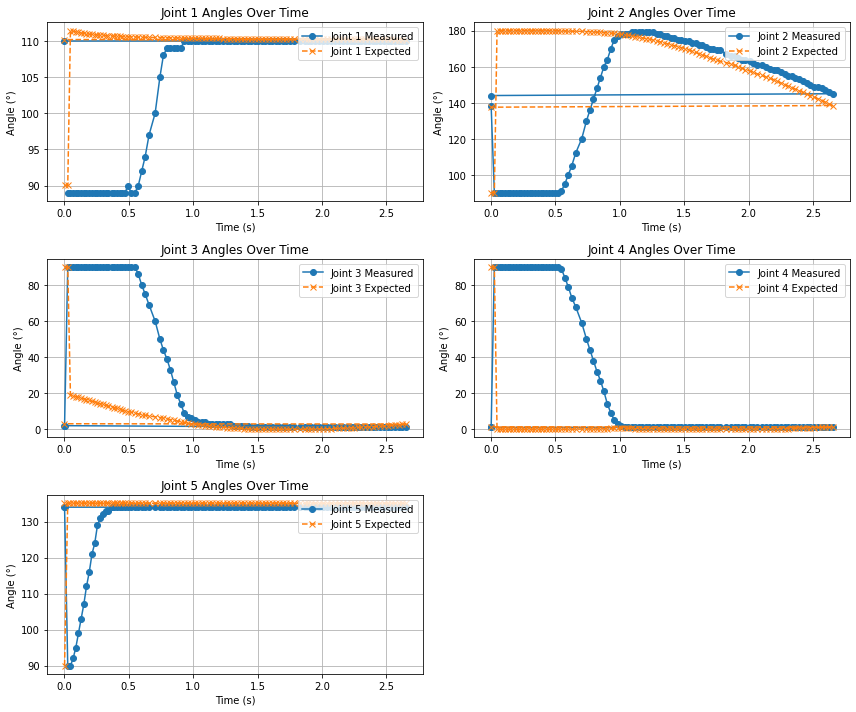

In [134]:
#execute the main loop unless the stop button is pressed to stop the kernel 
try:
    main()
except KeyboardInterrupt:
    print("Program closed!")
    pass

del Arm # release the arm object